# *Project Python Foundations: FoodHub Data Analysis*

---



**Marks: 60**

In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv'

In [3]:
df = pd.read_csv(path)

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [5]:
# import libraries for data visualization (I had to do it here because I had problems loading the data set and needed to do that first)
import matplotlib.pyplot as plt
import seaborn as sns

**Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape

(1898, 9)

There are 1,898 rows and 9 columns in the data.

**Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations: Initially, it looks like there are no missing data in the dataset. I'm wondering if the rating should be changed to an integer at some point during the project. There are 5 numerical columns in the data and 4 object type columns.

**Question 3:** Are there any missing values in the data?

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Observations: As I noticed above, all the numbers matched, and using this code to double-check, there are no null values in the dataset. If there were, I wouldn't bother looking for missing data in the order_id column or customer_id, because that should not influence the data in any way.

**Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# I would like to restrict the float value to 3 decimal places to make the charts easier to read
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df.describe().T
# I want to transpose the graph of information so that it is easier to read

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


Observations: The minimum time it takes for food to be prepared once it is ordered is 20 minutes, the average is about 27 minutes and the maximum time is 35 minutes.

**Question 5:** How many order are not rated?

In [ ]:
df.loc[df['rating'].str.contains("Not given", case=False)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.070,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.920,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.130,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.820,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.820,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.150,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24


Observations: I used a Boolean search type to find how many ratings had "Not given" listed. I used this type of search because Pandas kept giving me errors about "Not given" with some other search methods I used. Out of 1,898 data points, it is disappointing that 736, around 39%, of them were not rated. That will give us more uncertain data when we analyze ratings, unfortunately.

# *Exploratory Data Analysis (EDA)*

**Univariate Analysis**

**Question 6:** Explore all the variables and provide observations on their distributions.

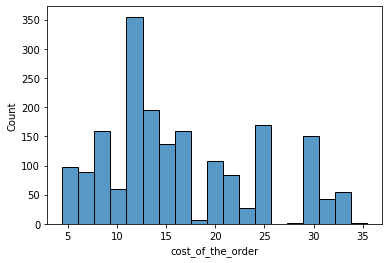

In [ ]:
# Generally, histograms, boxplots, countplots, etc. are used for univariate exploration
sns.histplot(data=df, x='cost_of_the_order')

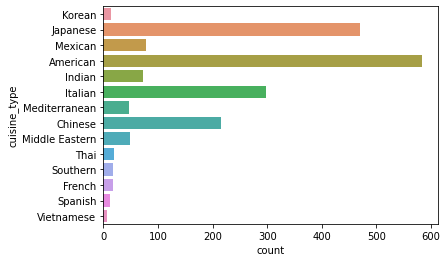

In [ ]:
sns.countplot(data=df, y='cuisine_type')

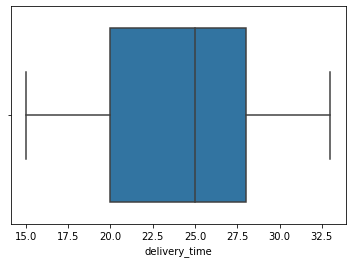

In [ ]:
sns.boxplot(data=df, x='delivery_time')

**Question 7:** Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
print(df['restaurant_name'].value_counts())

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64


Observations:

**Question 8:** What is the most popular cuisine on weekends?

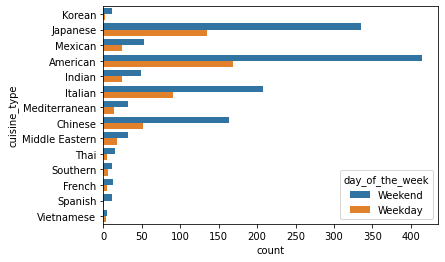

In [ ]:
sns.countplot(data=df, y='cuisine_type', hue='day_of_the_week')

In [ ]:
df.sort_values(by='cuisine_type', ascending=False)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1190,1476837,147468,Nha Trang One,Vietnamese,15.67,Weekday,3,23,24
1164,1478373,40808,V-Nam Cafe,Vietnamese,6.01,Weekday,3,20,31
640,1477799,399520,Xe May Sandwich Shop,Vietnamese,14.07,Weekday,Not given,28,28
1554,1476957,54630,V-Nam Cafe,Vietnamese,12.08,Weekend,Not given,31,19
373,1477014,399520,Xe May Sandwich Shop,Vietnamese,7.96,Weekend,5,25,29
...,...,...,...,...,...,...,...,...,...
298,1476728,250494,Bubby's,American,24.25,Weekend,Not given,34,28
295,1478324,250494,Blue Ribbon Fried Chicken,American,29.10,Weekend,4,21,22
1202,1477595,370337,Blue Ribbon Fried Chicken,American,12.23,Weekend,Not given,30,20
291,1477797,194778,Shake Shack,American,16.06,Weekend,5,30,17


In [32]:
df[['cuisine_type', 'day_of_the_week']]

,cuisine_type,day_of_the_week
0,Korean,Weekend
1,Japanese,Weekend
2,Mexican,Weekday
3,American,Weekend
4,American,Weekday
...,...,...
1893,Mexican,Weekend
1894,American,Weekend
1895,Japanese,Weekday
1896,Mediterranean,Weekday


In [33]:
df.groupby(by='day_of_the_week').size()

day_of_the_week
Weekday     547
Weekend    1351
dtype: int64

In [37]:
df.groupby(by='day_of_the_week')['cuisine_type'].count()

day_of_the_week
Weekday     547
Weekend    1351
Name: cuisine_type, dtype: int64

In [40]:
df.groupby(by='day_of_the_week')['cuisine_type'].describe()

,count,unique,top,freq
day_of_the_week,,,,
Weekday,547,14,American,169
Weekend,1351,14,American,415


In [42]:
df.groupby(by=['day_of_the_week', 'cuisine_type']).size()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Chinese            52
                 French              5
                 Indian             24
                 Italian            91
                 Japanese          135
                 Korean              2
                 Mediterranean      14
                 Mexican            24
                 Middle Eastern     17
                 Southern            6
                 Spanish             1
                 Thai                4
                 Vietnamese          3
Weekend          American          415
                 Chinese           163
                 French             13
                 Indian             49
                 Italian           207
                 Japanese          335
                 Korean             11
                 Mediterranean      32
                 Mexican            53
                 Middle Eastern     32
                 Southern       

In [ ]:
df.query()
#would need to save this as new df to query

In [44]:
df.groupby(by='cuisine_type')agg('day_of_the_week': ['weekend'])

SyntaxError: ignored

In [ ]:
df.groupby(['day_of_the_week'])['weekend'].mode()

KeyError: ignored

Observations:

**Question 9:** What percentage of the orders cost more than $20?

In [25]:
import decimal

In [14]:
print(df['cost_of_the_order'].value_counts())

12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: cost_of_the_order, Length: 312, dtype: int64


In [65]:
df.loc[df['cost_of_the_order']>20]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


In [28]:
df.loc[df['cost_of_the_order']>20].shape
print.decimal

AttributeError: ignored

Observations:

Is it better to create each of these as it's own file so that it is easier to analyze?

**Question 10** What is the mean order delivery time?

In [ ]:
df['delivery_time'].mean()

24.161749209694417

Observations:

**Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the ID's of these customers and the number of orders they placed.

In [9]:
print(df['customer_id'].value_counts())

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64


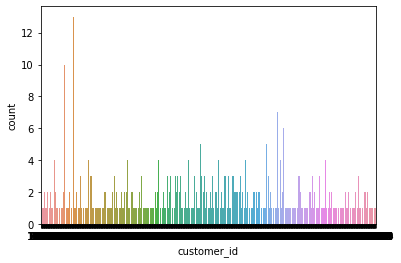

In [6]:
sns.countplot(data=df, x='customer_id')

Observations:

**Multivariate Analysis**

**Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset.

**Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

Observations:

**Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company accross all orders.

Observations:

**Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

Observations:

**Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

Observations:

**Conclusions and Recommendations**

**Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

Conclusions:

Recommendations: